# Optimizing Revenue Leakage & Profitability in the Hospitality Sector
This project analyzes booking data from a hotel chain to uncover patterns of revenue leakage and fluctuating profitability. Using data analytics techniques, we identify operational inefficiencies and propose actionable strategies to optimize revenue across room types, booking behaviors, and time windows.

In [367]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview

There are 4 datasets provided: 
1. Room_data: Data about the room types available.
2. Date_data: Data about the booking and check in dates, week number and day type.
3. Booking_data: Records of all the bookings. There are 134590 bookings accross 3 months of data.
4. Booking_agg: Date wise data of the successful bookings.

In [105]:
room_data=pd.read_csv('dim_rooms.csv')
room_data

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [107]:
room_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [109]:
hotels_data=pd.read_csv('dim_hotels.csv')
hotels_data

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [125]:
hotels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [126]:
date_data=pd.read_csv('dim_date.csv')
date_data

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [127]:
date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [128]:
booking_data=pd.read_csv('fact_bookings.csv')
booking_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [129]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [130]:
booking_agg=pd.read_csv('fact_aggregated_bookings.csv')
booking_agg

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [131]:
booking_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


# Data Cleaning and Data Preprocessing
Very minute cleaning required in Booking Data, to remove the null values.
Also changed the data types wherever needed.

In [132]:
booking_data.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [133]:
booking_data.fillna(booking_data['ratings_given'].mean(),inplace=True) 

In [134]:
booking_data['ratings_given']=booking_data['ratings_given'].astype('int32')

In [135]:
booking_data['check_in_date']=pd.to_datetime(booking_data['check_in_date'],errors='coerce')
booking_data['checkout_date']=pd.to_datetime(booking_data['checkout_date'],errors='coerce')
booking_data['booking_date']=pd.to_datetime(booking_data['booking_date'],errors='coerce')

In [136]:
booking_agg['check_in_date']=pd.to_datetime(booking_agg['check_in_date'],errors='coerce',format='%d-%b-%y')

In [137]:
date_data['date']=pd.to_datetime(date_data['date'],format='%d-%b-%y',errors='coerce')

In [138]:
date_data['mmm yy']=pd.to_datetime(date_data['mmm yy'],errors='coerce',format='%b %y').dt.month

In [139]:
date_data['week no'] = date_data['week no'].astype(str).str.split().str[1]

In [140]:
date_data['day_type']=date_data['day_type'].replace({'weekeday':'weekday'})

In [141]:
date_data

,date,mmm yy,week no,day_type
0,2022-05-01,5,19,weekend
1,2022-05-02,5,19,weekday
2,2022-05-03,5,19,weekday
3,2022-05-04,5,19,weekday
4,2022-05-05,5,19,weekday
...,...,...,...,...
87,2022-07-27,7,31,weekday
88,2022-07-28,7,31,weekday
89,2022-07-29,7,31,weekday
90,2022-07-30,7,31,weekend


In [142]:
date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     int32         
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 2.6+ KB


# Exploratory Data Analysis
1. Identified key areas of revenue leakage using booking and cancellation trends
2. Compared performance across room types, weekdays vs weekends, and seasons
3. Calculated KPIs like RevPAR, Occupancy Rate, and Cancellation Rate
4. Visualized trends using heatmaps and performance plots
5. Recommended data-driven strategies for revenue optimization

In [143]:
date_data['mmm yy'].unique()

array([5, 6, 7])

In [144]:
booking_data['booking_date'].dt.month.unique()

array([4, 5, 6, 7])

In [145]:
booking_data['check_in_date'].dt.month.unique()

array([5, 6, 7])

In [146]:
booking_agg['check_in_date'].dt.month.unique()
#acc all the cols we have data only related to May June July

array([5, 6, 7])

In [147]:
booking_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 359.5+ KB


In [148]:
booking_data.duplicated().value_counts()
booking_agg.duplicated().value_counts()

#no duplicated values

False    9200
Name: count, dtype: int64

In [149]:
hotels_data['category'].unique()

array(['Luxury', 'Business'], dtype=object)

In [150]:
hotels_data['property_name'].unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [151]:
print(booking_data.shape)
print('Total bookings in 3 months is',booking_data.shape[0])

(134590, 12)
Total bookings in 3 months is 134590


In [152]:
booking_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300


In [153]:
totalrev=booking_data['revenue_realized'].sum()
totalrev
#Total revenue

1708771229

In [154]:
revtobe=booking_data['revenue_generated'].sum()
revtobe
#To be generated

2007546215

In [155]:
net_loss=((revtobe-totalrev)/revtobe)*100
net_loss
#net loss percentage

14.882595666670618

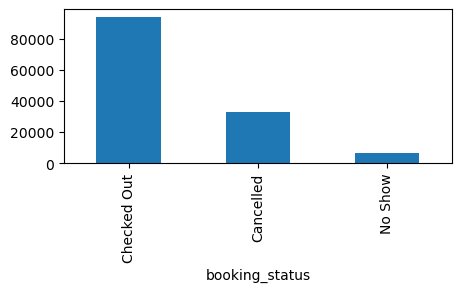

In [156]:
plt.figure(figsize=(5,2))
booking_data['booking_status'].value_counts().plot(kind='bar')
plt.show()

In [157]:
df1=booking_data[booking_data['booking_status']=='No Show']
df1['r']=df1['revenue_generated']-df1['revenue_realized']
df1['r'].unique()
#no show no refund

C:\Users\USER\AppData\Local\Temp\ipykernel_8600\1905400426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r']=df1['revenue_generated']-df1['revenue_realized']


array([0], dtype=int64)

In [158]:
df2=booking_data[booking_data['booking_status']=='Cancelled']
df2['r']=df2['revenue_generated']-df2['revenue_realized']
df2['%']=(df2['r']/df2['revenue_generated'])*100
df2['%'].unique()

#60% return upon cancellation- permanent no bias

C:\Users\USER\AppData\Local\Temp\ipykernel_8600\1207320056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['r']=df2['revenue_generated']-df2['revenue_realized']
C:\Users\USER\AppData\Local\Temp\ipykernel_8600\1207320056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['%']=(df2['r']/df2['revenue_generated'])*100


array([60.])

In [159]:
booking_data['revenue_leakage']=booking_data['revenue_generated']-booking_data['revenue_realized']
booking_data

#added col of revenue leakage 

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0


In [160]:
status=booking_data.groupby('booking_status')['booking_id'].count().reset_index()
status

,booking_status,booking_id
0,Cancelled,33420
1,Checked Out,94411
2,No Show,6759


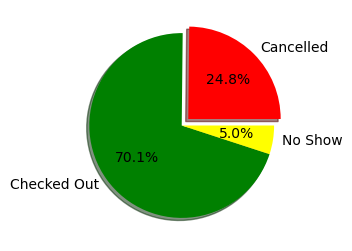

In [161]:
plt.figure(figsize=(7,3))
plt.pie(status['booking_id'],labels=status['booking_status'],explode=[0.1,0,0],autopct='%0.1f%%',shadow=True,colors=['red','green','yellow'])
plt.show()

In [162]:
df_canc=booking_data[booking_data['booking_status']=='Cancelled']
df_canc

#filtered out cancelled ids

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460
6,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2,RT1,others,3,Cancelled,9100,3640,5460
13,May012216558RT114,16558,2022-04-30,2022-05-01,2022-05-05,1,RT1,logtrip,3,Cancelled,9100,3640,5460
21,May012216558RT24,16558,2022-04-29,2022-05-01,2022-05-03,3,RT2,others,3,Cancelled,13860,5544,8316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT219,17564,2022-07-29,2022-07-31,2022-08-01,2,RT2,others,3,Cancelled,15300,6120,9180
134570,Jul312217564RT32,17564,2022-07-31,2022-07-31,2022-08-03,4,RT3,journey,3,Cancelled,24480,9792,14688
134583,Jul312217564RT44,17564,2022-07-31,2022-07-31,2022-08-01,1,RT4,others,3,Cancelled,32300,12920,19380
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380


In [163]:
df_noshow=booking_data[booking_data['booking_status']=='No Show']
df_noshow

#filtered out no show

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage
7,May012216558RT18,16558,2022-04-26,2022-05-01,2022-05-03,2,RT1,logtrip,3,No Show,9100,9100,0
32,May012216558RT215,16558,2022-04-29,2022-05-01,2022-05-04,2,RT2,direct offline,3,No Show,12600,12600,0
67,May012216559RT118,16559,2022-04-27,2022-05-01,2022-05-03,2,RT1,others,3,No Show,11050,11050,0
93,May012216559RT219,16559,2022-04-29,2022-05-01,2022-05-02,3,RT2,others,3,No Show,16830,16830,0
101,May012216559RT227,16559,2022-04-29,2022-05-01,2022-05-03,2,RT2,tripster,3,No Show,15300,15300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134525,Jul312219563RT37,19563,2022-07-30,2022-07-31,2022-08-01,1,RT3,others,3,No Show,18000,18000,0
134535,Jul312219563RT317,19563,2022-07-31,2022-07-31,2022-08-01,1,RT3,others,3,No Show,18000,18000,0
134548,Jul312217564RT17,17564,2022-07-31,2022-07-31,2022-08-01,1,RT1,direct offline,3,No Show,11050,11050,0
134567,Jul312217564RT218,17564,2022-07-31,2022-07-31,2022-08-02,1,RT2,others,3,No Show,15300,15300,0


In [164]:
df_co=booking_data[booking_data['booking_status']=='Checked Out']
df_co

#filtered out checked out

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4,Checked Out,9100,9100,0
8,May012216558RT19,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,tripster,3,Checked Out,9100,9100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1,Checked Out,32300,32300,0
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2,Checked Out,32300,32300,0
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0


In [165]:
booking_data['property_id'].nunique()

25

In [166]:
booking_agg

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30
1,19562,2022-05-01,RT1,28,30
2,19563,2022-05-01,RT1,23,30
3,17558,2022-05-01,RT1,13,19
4,16558,2022-05-01,RT1,18,19
...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18
9196,16559,2022-07-31,RT4,13,18
9197,17558,2022-07-31,RT4,3,6
9198,19563,2022-07-31,RT4,3,6


In [167]:
sucbk=booking_agg.groupby('property_id')['successful_bookings'].sum().sort_values(ascending=False).reset_index()
sucbk

,property_id,successful_bookings
0,16559,7338
1,18562,7333
2,16563,7147
3,18560,6638
4,18561,6458
5,17563,6337
6,17559,6142
7,17560,6013
8,19560,5979
9,19562,5812


In [168]:
hotels_data.shape

(25, 4)

In [169]:
sucbk1=sucbk.merge(hotels_data,how='inner',on='property_id')
sucbk1

,property_id,successful_bookings,property_name,category,city
0,16559,7338,Atliq Exotica,Luxury,Mumbai
1,18562,7333,Atliq Bay,Luxury,Hyderabad
2,16563,7147,Atliq Palace,Business,Delhi
3,18560,6638,Atliq City,Business,Hyderabad
4,18561,6458,Atliq Blu,Luxury,Hyderabad
5,17563,6337,Atliq Palace,Business,Mumbai
6,17559,6142,Atliq Exotica,Luxury,Mumbai
7,17560,6013,Atliq City,Business,Mumbai
8,19560,5979,Atliq City,Business,Bangalore
9,19562,5812,Atliq Bay,Luxury,Bangalore


In [170]:
sucbk1.groupby('city')['successful_bookings'].sum().sort_values(ascending=False)

city
Mumbai       43455
Hyderabad    34888
Bangalore    32016
Delhi        24231
Name: successful_bookings, dtype: int64

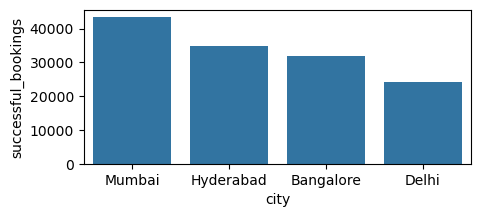

In [171]:
plt.figure(figsize=(5,2))
sns.barplot(sucbk1.groupby('city')['successful_bookings'].sum().sort_values(ascending=False))
plt.show()

In [172]:
sucbk1.groupby('category')['successful_bookings'].sum()

#luxury bookings have more counts

category
Business    50930
Luxury      83660
Name: successful_bookings, dtype: int64

In [173]:
sucbk1.groupby(['city','category'])['successful_bookings'].sum()

#mumbai,hyderabad, bangalore bookings significantly higher 
#luxury class of delhi underperforming a lot
#business class services to be improved

city       category
Bangalore  Business    11392
           Luxury      20624
Delhi      Business    11840
           Luxury      12391
Hyderabad  Business    11366
           Luxury      23522
Mumbai     Business    16332
           Luxury      27123
Name: successful_bookings, dtype: int64

In [174]:
sucb=sucbk1.groupby(['city','category'])['successful_bookings'].sum().reset_index()
sucb

,city,category,successful_bookings
0,Bangalore,Business,11392
1,Bangalore,Luxury,20624
2,Delhi,Business,11840
3,Delhi,Luxury,12391
4,Hyderabad,Business,11366
5,Hyderabad,Luxury,23522
6,Mumbai,Business,16332
7,Mumbai,Luxury,27123


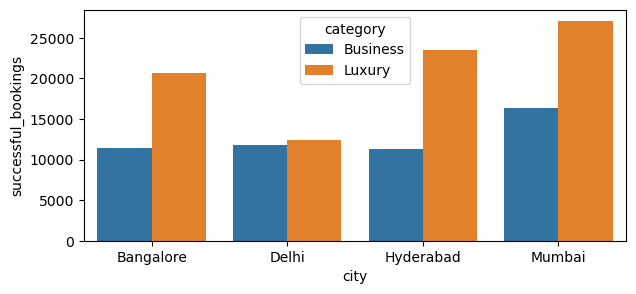

In [175]:
plt.figure(figsize=(7,3))
sns.barplot(data=sucb,x=sucb['city'],y='successful_bookings',errorbar=None,hue='category')
plt.show()

In [176]:
booking_data.shape

(134590, 13)

In [177]:
rev_ria=booking_data.groupby('room_category')['revenue_realized'].sum()
rev_ria

room_category
RT1    309580895
RT2    560271204
RT3    462166344
RT4    376752786
Name: revenue_realized, dtype: int64

In [178]:
av_rooms=booking_agg.groupby('room_category')['capacity'].sum()
av_rooms

room_category
RT1    66424
RT2    85928
RT3    53084
RT4    27140
Name: capacity, dtype: int64

In [179]:
revpar=rev_ria/av_rooms
revpar
#seasonal REVPAR
#rt1 and rt2 services should be improved, discounted price, pricing strategy should be changed
#rt4--profit
#rt4 strategies to be checked and better should be applied for others
#if poss. rt4 price increase a bit

room_category
RT1     4660.678294
RT2     6520.240248
RT3     8706.321001
RT4    13881.827045
dtype: float64

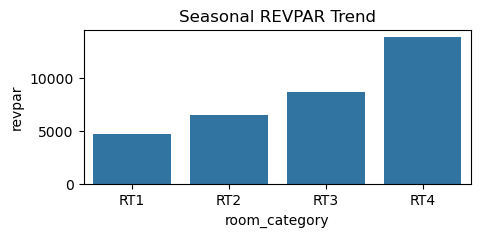

In [180]:
plt.figure(figsize=(5,2))
sns.barplot(revpar)
plt.title('Seasonal REVPAR Trend')
plt.ylabel('revpar')
plt.show()

In [181]:
df_canc['lead_time']=(df_canc['check_in_date']-df_canc['booking_date']).dt.days
df_canc

#to study variation with lead time

C:\Users\USER\AppData\Local\Temp\ipykernel_8600\3110621510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canc['lead_time']=(df_canc['check_in_date']-df_canc['booking_date']).dt.days


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3
6,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2,RT1,others,3,Cancelled,9100,3640,5460,3
13,May012216558RT114,16558,2022-04-30,2022-05-01,2022-05-05,1,RT1,logtrip,3,Cancelled,9100,3640,5460,1
21,May012216558RT24,16558,2022-04-29,2022-05-01,2022-05-03,3,RT2,others,3,Cancelled,13860,5544,8316,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT219,17564,2022-07-29,2022-07-31,2022-08-01,2,RT2,others,3,Cancelled,15300,6120,9180,2
134570,Jul312217564RT32,17564,2022-07-31,2022-07-31,2022-08-03,4,RT3,journey,3,Cancelled,24480,9792,14688,0
134583,Jul312217564RT44,17564,2022-07-31,2022-07-31,2022-08-01,1,RT4,others,3,Cancelled,32300,12920,19380,0
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1


In [182]:
df_canc['lead_time'].unique()

array([ 1,  3,  2,  5,  4,  6,  0, 24, 20, 21,  7], dtype=int64)

In [183]:
# last min cancellations
df_canc[df_canc['lead_time']<=2]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1
13,May012216558RT114,16558,2022-04-30,2022-05-01,2022-05-05,1,RT1,logtrip,3,Cancelled,9100,3640,5460,1
21,May012216558RT24,16558,2022-04-29,2022-05-01,2022-05-03,3,RT2,others,3,Cancelled,13860,5544,8316,2
28,May012216558RT211,16558,2022-04-30,2022-05-01,2022-05-07,2,RT2,makeyourtrip,3,Cancelled,12600,5040,7560,1
34,May012216558RT217,16558,2022-04-29,2022-05-01,2022-05-07,4,RT2,makeyourtrip,3,Cancelled,15120,6048,9072,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT219,17564,2022-07-29,2022-07-31,2022-08-01,2,RT2,others,3,Cancelled,15300,6120,9180,2
134570,Jul312217564RT32,17564,2022-07-31,2022-07-31,2022-08-03,4,RT3,journey,3,Cancelled,24480,9792,14688,0
134583,Jul312217564RT44,17564,2022-07-31,2022-07-31,2022-08-01,1,RT4,others,3,Cancelled,32300,12920,19380,0
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1


In [184]:
df_canc[df_canc['lead_time']<=2].groupby('booking_platform')['booking_id'].count()

#lastmin canc trend- platform wise

booking_platform
direct offline     810
direct online     1625
journey            996
logtrip           1724
makeyourtrip      3238
others            6764
tripster          1161
Name: booking_id, dtype: int64

In [185]:
lastmin_canc=(df_canc[df_canc['lead_time']<=2].shape[0]/df_canc.shape[0])*100
lastmin_canc

#lastmin cancellations higher domination
#strategy- no refund for such cancellations/cancellation penalty
#prepayment, add some friction,track repeating cancellation pattern,loyalty point or discount perks for guarenteed booking


48.82704967085578

In [186]:
df_canc.groupby('room_category')['booking_id'].count().sort_values(ascending=False)
#roomwise cancellation trend

room_category
RT2    12357
RT1     9530
RT3     7605
RT4     3928
Name: booking_id, dtype: int64

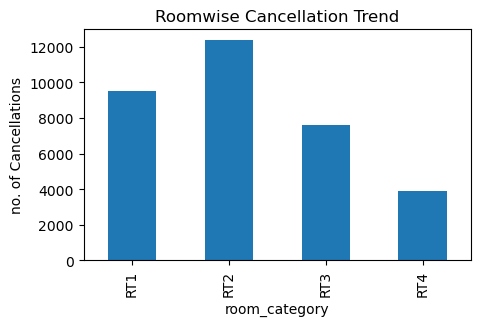

In [187]:
df_canc.groupby('room_category')['booking_id'].count().plot(kind='bar',figsize=(5,3),ylabel='no. of Cancellations',title='Roomwise Cancellation Trend')
plt.show()

In [337]:
#weekend vs weekday performance basis of revenue realized
booking_data.merge(date_data,how='left',left_on='check_in_date',right_on='date')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time,stay_dur,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,4,1 days,2022-05-01,5,19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1,1 days,2022-05-01,5,19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3,3 days,2022-05-01,5,19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3,1 days,2022-05-01,5,19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,4,1 days,2022-05-01,5,19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,2,3 days,2022-07-31,7,32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,1,1 days,2022-07-31,7,32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1,2 days,2022-07-31,7,32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0,2,1 days,2022-07-31,7,32,weekend


In [338]:
wow=booking_data.merge(date_data,how='left',left_on='check_in_date',right_on='date')
wow

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time,stay_dur,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,4,1 days,2022-05-01,5,19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1,1 days,2022-05-01,5,19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3,3 days,2022-05-01,5,19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3,1 days,2022-05-01,5,19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,4,1 days,2022-05-01,5,19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,2,3 days,2022-07-31,7,32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,1,1 days,2022-07-31,7,32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1,2 days,2022-07-31,7,32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0,2,1 days,2022-07-31,7,32,weekend


In [339]:
wow.groupby(['day_type','booking_status'])['booking_id'].count()

day_type  booking_status
weekday   Cancelled         21123
          Checked Out       59020
          No Show            4222
weekend   Cancelled         12297
          Checked Out       35391
          No Show            2537
Name: booking_id, dtype: int64

In [340]:
wow3=wow.groupby(['day_type','booking_status'])['booking_id'].count().reset_index()
wow3

,day_type,booking_status,booking_id
0,weekday,Cancelled,21123
1,weekday,Checked Out,59020
2,weekday,No Show,4222
3,weekend,Cancelled,12297
4,weekend,Checked Out,35391
5,weekend,No Show,2537


In [341]:
wow['mmm yy'].astype('int32')
wow4=wow.groupby(['room_category','day_type'])['revenue_realized'].sum().reset_index()
wow4

,room_category,day_type,revenue_realized
0,RT1,weekday,193890424
1,RT1,weekend,115690471
2,RT2,weekday,350975358
3,RT2,weekend,209295846
4,RT3,weekday,288609024
5,RT3,weekend,173557320
6,RT4,weekday,236228976
7,RT4,weekend,140523810


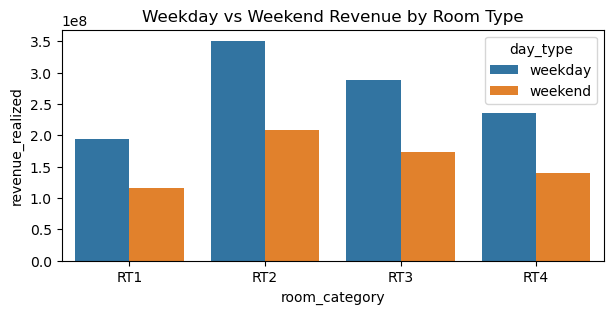

In [342]:
plt.figure(figsize=(7,3))
sns.barplot(data=wow4,x=wow4['room_category'],y='revenue_realized',errorbar=None,hue='day_type')
plt.title('Weekday vs Weekend Revenue by Room Type')
plt.show()

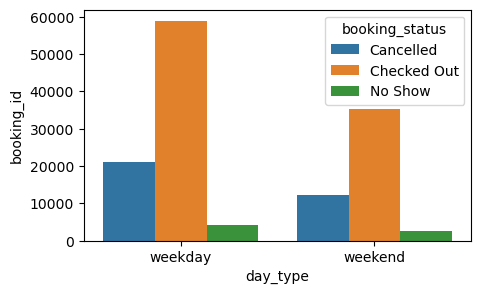

In [343]:
plt.figure(figsize=(5,3))
sns.barplot(data=wow3,x=wow3['day_type'],y='booking_id',errorbar=None,hue='booking_status')
plt.show()

#wow performance

In [344]:
wow.groupby(['room_category','day_type'])['booking_id'].count()

room_category  day_type
RT1            weekday     24116
               weekend     14330
RT2            weekday     31040
               weekend     18465
RT3            weekday     19104
               weekend     11462
RT4            weekday     10105
               weekend      5968
Name: booking_id, dtype: int64

In [345]:
wow1=wow.groupby(['room_category','day_type'])['booking_id'].count().reset_index()
wow1

,room_category,day_type,booking_id
0,RT1,weekday,24116
1,RT1,weekend,14330
2,RT2,weekday,31040
3,RT2,weekend,18465
4,RT3,weekday,19104
5,RT3,weekend,11462
6,RT4,weekday,10105
7,RT4,weekend,5968


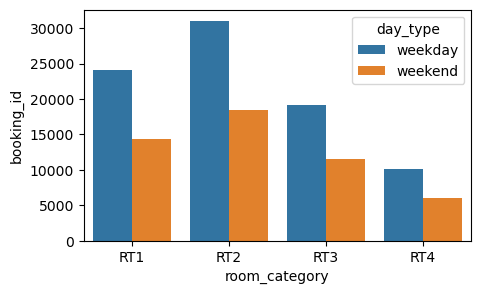

In [346]:
plt.figure(figsize=(5,3))
sns.barplot(data=wow1,x=wow1['room_category'],y='booking_id',errorbar=None,hue='day_type')
plt.show()

#performance of roomtype in weekend and weekdays

In [347]:
wow['booking_platform'].nunique()

7

In [348]:
wow2=wow.groupby(['booking_platform','day_type'])['booking_id'].count().reset_index()
wow2

,booking_platform,day_type,booking_id
0,direct offline,weekday,4281
1,direct offline,weekend,2474
2,direct online,weekday,8432
3,direct online,weekend,4947
4,journey,weekday,5098
5,journey,weekend,3008
6,logtrip,weekday,9207
7,logtrip,weekend,5549
8,makeyourtrip,weekday,16839
9,makeyourtrip,weekend,10059


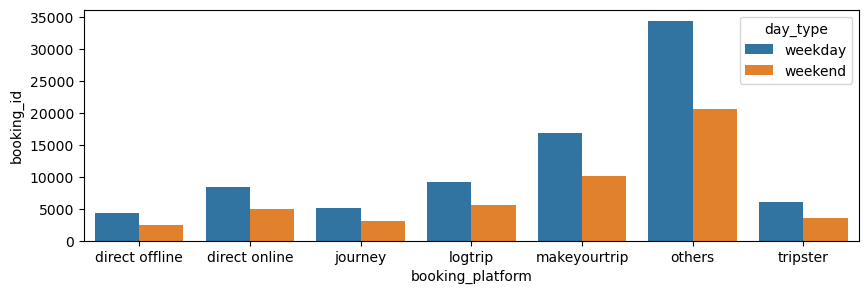

In [349]:
plt.figure(figsize=(10,3))
sns.barplot(data=wow2,x=wow2['booking_platform'],y='booking_id',errorbar=None,hue='day_type')
plt.show()

#weekend vs weekday performance of booking platforms

In [350]:
wow.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time,stay_dur,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,4,1 days,2022-05-01,5,19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1,1 days,2022-05-01,5,19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3,3 days,2022-05-01,5,19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3,1 days,2022-05-01,5,19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,4,1 days,2022-05-01,5,19,weekend


In [351]:
we=wow[wow['day_type']=='weekend']
we

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time,stay_dur,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,4,1 days,2022-05-01,5,19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1,1 days,2022-05-01,5,19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3,3 days,2022-05-01,5,19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3,1 days,2022-05-01,5,19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,4,1 days,2022-05-01,5,19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,2,3 days,2022-07-31,7,32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,1,1 days,2022-07-31,7,32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1,2 days,2022-07-31,7,32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0,2,1 days,2022-07-31,7,32,weekend


In [352]:
wd=wow[wow['day_type']=='weekday']
wd

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time,stay_dur,date,mmm yy,week no,day_type
2005,May022216558RT11,16558,2022-04-28,2022-05-02,2022-05-03,2,RT1,makeyourtrip,4,Checked Out,9100,9100,0,4,1 days,2022-05-02,5,19,weekday
2006,May022216558RT12,16558,2022-04-28,2022-05-02,2022-05-03,2,RT1,direct offline,5,Checked Out,9100,9100,0,4,1 days,2022-05-02,5,19,weekday
2007,May022216558RT13,16558,2022-04-30,2022-05-02,2022-05-03,2,RT1,others,3,Checked Out,9100,9100,0,2,1 days,2022-05-02,5,19,weekday
2008,May022216558RT14,16558,2022-04-30,2022-05-02,2022-05-08,2,RT1,others,3,Checked Out,9100,9100,0,2,6 days,2022-05-02,5,19,weekday
2009,May022216558RT15,16558,2022-04-29,2022-05-02,2022-05-04,2,RT1,makeyourtrip,4,Checked Out,9100,9100,0,3,2 days,2022-05-02,5,19,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131296,Jul292217564RT41,17564,2022-07-26,2022-07-29,2022-07-30,4,RT4,logtrip,3,Cancelled,38760,15504,23256,3,1 days,2022-07-29,7,31,weekday
131297,Jul292217564RT42,17564,2022-07-26,2022-07-29,2022-07-30,1,RT4,logtrip,3,Checked Out,32300,32300,0,3,1 days,2022-07-29,7,31,weekday
131298,Jul292217564RT43,17564,2022-07-26,2022-07-29,2022-07-30,1,RT4,others,4,Checked Out,32300,32300,0,3,1 days,2022-07-29,7,31,weekday
131299,Jul292217564RT44,17564,2022-07-28,2022-07-29,2022-08-02,1,RT4,makeyourtrip,3,No Show,32300,32300,0,1,4 days,2022-07-29,7,31,weekday


In [353]:
booking_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,unbooked
0,16559,2022-05-01,RT1,25,30,5
1,19562,2022-05-01,RT1,28,30,2
2,19563,2022-05-01,RT1,23,30,7
3,17558,2022-05-01,RT1,13,19,6
4,16558,2022-05-01,RT1,18,19,1


In [354]:
we['revenue_realized'].sum()


639067447

In [355]:
wd['revenue_realized'].sum()

1069703782

In [356]:
we['booking_id'].count()

50225

In [357]:
wd['booking_id'].count()

84365

In [358]:
#Average daily rate (weekend)
we['revenue_realized'].sum()/we['booking_id'].count()


12724.090532603284

In [359]:
#Average daily rate (weekday)
wd['revenue_realized'].sum()/wd['booking_id'].count()

12679.473502044686

In [360]:
#Cancellation rate in wday

(wd[wd['booking_status']=='Cancelled'].shape[0]/wd.shape[0]) *100

25.03763408996622

In [361]:
#Cancellation rate in wend

(we[we['booking_status']=='Cancelled'].shape[0]/we.shape[0]) *100

24.483822797411648

In [362]:
#Lead time based analysis

we['lead_time']=we['check_in_date']-we['booking_date']
wd['lead_time']=wd['check_in_date']-wd['booking_date']

C:\Users\USER\AppData\Local\Temp\ipykernel_8600\3176243249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  we['lead_time']=we['check_in_date']-we['booking_date']
C:\Users\USER\AppData\Local\Temp\ipykernel_8600\3176243249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd['lead_time']=wd['check_in_date']-wd['booking_date']


In [363]:
#last min canc (weekend vs weekday)

we_canc=we[we['booking_status']=='Cancelled']
(we_canc[we_canc['lead_time']<='2 days'].shape[0]/we_canc.shape[0]) *100

48.88184109945515

In [364]:
wd_canc=wd[wd['booking_status']=='Cancelled']
(wd_canc[wd_canc['lead_time']<='2 days'].shape[0]/wd_canc.shape[0]) *100

48.79515220375893

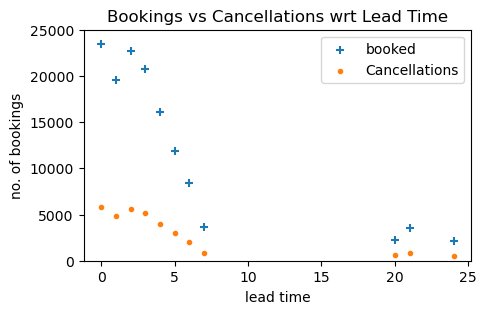

In [365]:
booking_data['lead_time']=(booking_data['check_in_date']-booking_data['booking_date']).dt.days
lead=booking_data.groupby('lead_time')['booking_id'].count().reset_index()
lead_canc=df_canc.groupby('lead_time')['booking_id'].count().reset_index()
plt.figure(figsize=(5,3))
plt.scatter(lead['lead_time'],lead['booking_id'],marker='+',label='booked')
plt.scatter(lead_canc['lead_time'],lead_canc['booking_id'],marker='.',label='Cancellations')
plt.xlabel('lead time')
plt.ylabel('no. of bookings')
plt.title('Bookings vs Cancellations wrt Lead Time')
plt.ylim(0,25000)
plt.legend()
plt.show()

#lead time wise bookings vs cancellations

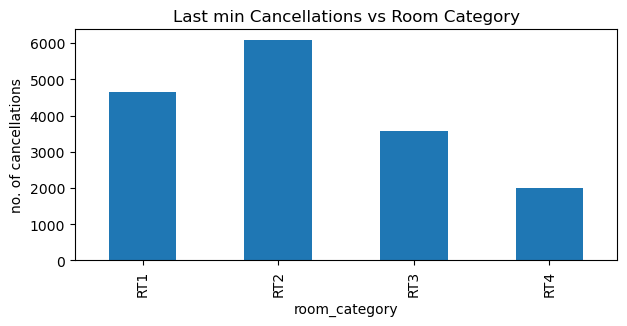

In [366]:
lstmin_canc=df_canc[df_canc['lead_time']<=2]
lstmin_canc.groupby('room_category')['booking_id'].count().plot(kind='bar',figsize=(7,3))
plt.ylabel('no. of cancellations')
plt.title('Last min Cancellations vs Room Category')
plt.show()

In [221]:
booking_data['check_in_date'].dt.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [222]:
booking_data.groupby(booking_data['check_in_date'].dt.day)['booking_id'].count()

check_in_date
1     4543
2     4538
3     4545
4     4416
5     4808
6     4194
7     4793
8     4792
9     4769
10    4820
11    4825
12    4761
13    4187
14    4789
15    4437
16    4540
17    4165
18    4295
19    3931
20    3451
21    3940
22    4294
23    4191
24    4161
25    4192
26    4522
27    3909
28    4549
29    4245
30    4185
31    2803
Name: booking_id, dtype: int64

In [225]:
md=booking_data.merge(date_data,how='left',left_on='check_in_date',right_on='date')
md

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,4,2022-05-01,5,19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1,2022-05-01,5,19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3,2022-05-01,5,19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3,2022-05-01,5,19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,4,2022-05-01,5,19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,2,2022-07-31,7,32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,1,2022-07-31,7,32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1,2022-07-31,7,32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0,2,2022-07-31,7,32,weekend


In [226]:
md.groupby('mmm yy')['revenue_realized'].sum().reset_index()

,mmm yy,revenue_realized
0,5,581930666
1,6,553932355
2,7,572908208


In [227]:
md.groupby('mmm yy')['booking_id'].count().reset_index()

,mmm yy,booking_id
0,5,45882
1,6,43683
2,7,45025


In [228]:
md.groupby('mmm yy')['revenue_realized'].sum().reset_index().merge(md.groupby('mmm yy')['booking_id'].count().reset_index(),how='inner',on='mmm yy')

#month wise booking vs rev ria

,mmm yy,revenue_realized,booking_id
0,5,581930666,45882
1,6,553932355,43683
2,7,572908208,45025


In [229]:
md['week no'].unique()

array(['19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32'], dtype=object)

In [230]:
md.groupby('week no')['revenue_realized'].sum().reset_index().merge(md.groupby('week no')['booking_id'].count().reset_index(),how='inner',on='week no')

#week wise booking vs rev ria

,week no,revenue_realized,booking_id
0,19,138182064,10965
1,20,139435920,10958
2,21,114922175,9042
3,22,138720126,10934
4,23,115568569,9089
5,24,139581703,11041
6,25,138674279,10943
7,26,114152421,9017
8,27,139555632,10962
9,28,139383916,10929


In [231]:
md.groupby(['mmm yy','booking_status'])['booking_id'].count()

#month wise cancellation

mmm yy  booking_status
5       Cancelled         11447
        Checked Out       32037
        No Show            2398
6       Cancelled         10960
        Checked Out       30601
        No Show            2122
7       Cancelled         11013
        Checked Out       31773
        No Show            2239
Name: booking_id, dtype: int64

In [232]:
booking_data['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [233]:
booking_data.groupby('booking_platform')['revenue_leakage'].sum().sort_values(ascending=False).reset_index().set_index('booking_platform')

#revenue leakages wrt booking platform

,revenue_leakage
booking_platform,
others,121713318
makeyourtrip,60667626
logtrip,31924467
direct online,29743563
tripster,21647709
journey,18123381
direct offline,14954922


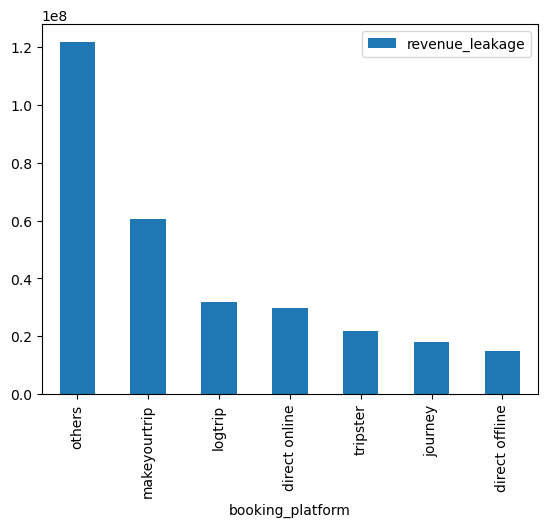

In [234]:
booking_data.groupby('booking_platform')['revenue_leakage'].sum().sort_values(ascending=False).reset_index().set_index('booking_platform').plot(kind='bar')
plt.show()

In [235]:
booking_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,4
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,2
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,1
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0,2


In [236]:
hotels_data

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [237]:
#number of rooms unbooked, property wise, room wise, throughout the season

booking_agg['unbooked']=booking_agg['capacity']-booking_agg['successful_bookings']
booking_agg.groupby(['property_id','room_category'])['unbooked'].sum().reset_index()

,property_id,room_category,unbooked
0,16558,RT1,606
1,16558,RT2,698
2,16558,RT3,258
3,16558,RT4,69
4,16559,RT1,925
...,...,...,...
95,19562,RT4,430
96,19563,RT1,1293
97,19563,RT2,1922
98,19563,RT3,1246


In [238]:
booking_agg['check_in_date'].nunique()

92

In [239]:
booking_data.groupby(['property_id','room_category'])['revenue_generated'].sum()

property_id  room_category
16558        RT1              10805340
             RT2              17288460
             RT3               8401680
             RT4               5756240
16559        RT1              20972900
                                ...   
19562        RT4              25689900
19563        RT1              14658150
             RT2              30667950
             RT3              26616600
             RT4               9003150
Name: revenue_generated, Length: 100, dtype: int64

In [240]:
booking_data.groupby(['property_id','room_category'])['booking_id'].count()

property_id  room_category
16558        RT1              1142
             RT2              1326
             RT3               478
             RT4               207
16559        RT1              1835
                              ... 
19562        RT4               858
19563        RT1              1467
             RT2              2218
             RT3              1422
             RT4               306
Name: booking_id, Length: 100, dtype: int64

In [241]:
#Average daily rate considering checkout

adr= (booking_data.groupby(['property_id','room_category'])['revenue_generated'].sum()/booking_data.groupby(['property_id','room_category'])['booking_id'].count()).reset_index()
adr

,property_id,room_category,0
0,16558,RT1,9461.768827
1,16558,RT2,13038.054299
2,16558,RT3,17576.736402
3,16558,RT4,27807.922705
4,16559,RT1,11429.373297
...,...,...,...
95,19562,RT4,29941.608392
96,19563,RT1,9991.922290
97,19563,RT2,13826.848512
98,19563,RT3,18717.721519


In [242]:
pot_rev=booking_agg.groupby(['property_id','room_category'])['unbooked'].sum().reset_index().merge(adr,how='inner',on=['property_id','room_category'])
pot_rev

,property_id,room_category,unbooked,0
0,16558,RT1,606,9461.768827
1,16558,RT2,698,13038.054299
2,16558,RT3,258,17576.736402
3,16558,RT4,69,27807.922705
4,16559,RT1,925,11429.373297
...,...,...,...,...
95,19562,RT4,430,29941.608392
96,19563,RT1,1293,9991.922290
97,19563,RT2,1922,13826.848512
98,19563,RT3,1246,18717.721519


In [243]:
#pot rev that could have been generated if all rooms were booked

pot_rev['potrev_gen']=pot_rev[0]*pot_rev['unbooked']
pot_rev

,property_id,room_category,unbooked,0,potrev_gen
0,16558,RT1,606,9461.768827,5.733832e+06
1,16558,RT2,698,13038.054299,9.100562e+06
2,16558,RT3,258,17576.736402,4.534798e+06
3,16558,RT4,69,27807.922705,1.918747e+06
4,16559,RT1,925,11429.373297,1.057217e+07
...,...,...,...,...,...
95,19562,RT4,430,29941.608392,1.287489e+07
96,19563,RT1,1293,9991.922290,1.291956e+07
97,19563,RT2,1922,13826.848512,2.657520e+07
98,19563,RT3,1246,18717.721519,2.332228e+07


In [244]:
pot_rev['potrev_gen'].sum()

#could have earned around this amt more (irrespective of leakage)

1455772816.4142323

In [245]:
booking_data['revenue_realized'].sum()

1708771229

In [246]:
(pot_rev['potrev_gen'].sum())/((pot_rev['potrev_gen'].sum())+(booking_data['revenue_realized'].sum()))*100

46.00260876519652

In [247]:
booking_agg['unbooked']=booking_agg['capacity']-booking_agg['successful_bookings']

In [248]:
bub=booking_agg.merge(date_data,how='left',left_on='check_in_date',right_on='date').groupby('week no')[['successful_bookings','unbooked','capacity']].sum().reset_index()
bub

,week no,successful_bookings,unbooked,capacity
0,19,10965,6731,17696
1,20,10958,6738,17696
2,21,9042,8654,17696
3,22,10934,6762,17696
4,23,9089,8607,17696
5,24,11041,6655,17696
6,25,10943,6753,17696
7,26,9017,8679,17696
8,27,10962,6734,17696
9,28,10929,6767,17696


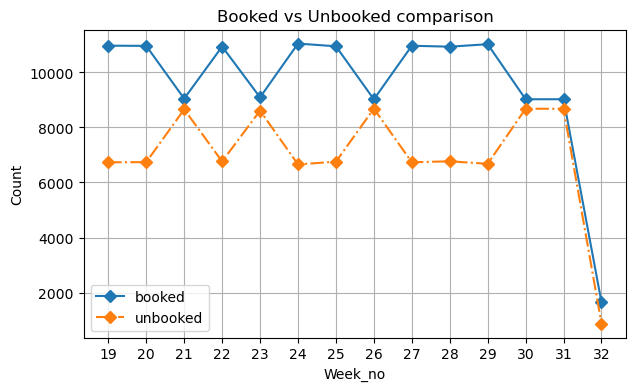

In [249]:
plt.figure(figsize=(7,4))
plt.plot(bub['week no'],bub['successful_bookings'],marker='D',label='booked')
plt.plot(bub['week no'],bub['unbooked'],marker='D',linestyle='dashdot',label='unbooked')

plt.title('Booked vs Unbooked comparison')
plt.xlabel('Week_no')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

#booked vs unbooked analysis week wise

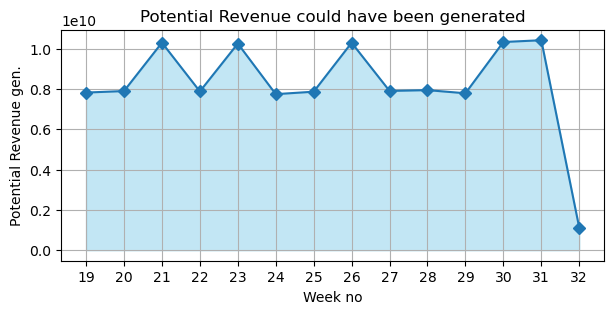

In [319]:
ao['unbooked']=ao['capacity']-ao['successful_bookings']
ao['potrev']=ao['unbooked']*ao['adr']
plt.figure(figsize=(7,3))
plt.plot(ao['week no'],ao['potrev'],marker='D')
plt.fill_between(ao['week no'], ao['potrev'], color="skyblue", alpha=0.5)
plt.title('Potential Revenue could have been generated')
plt.xlabel('Week no')
plt.ylabel('Potential Revenue gen.')
plt.grid()
plt.show()

In [250]:
w_leak=booking_data.merge(date_data,how='left',left_on='check_in_date',right_on='date').groupby('week no')['revenue_leakage'].sum().reset_index()
w_leak

,week no,revenue_leakage
0,19,24990441
1,20,23845725
2,21,19791270
3,22,24828144
4,23,19723506
5,24,25056852
6,25,24877626
7,26,20376099
8,27,24048618
9,28,23765484


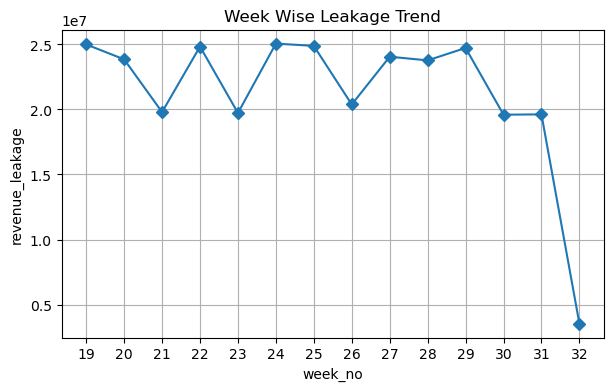

In [251]:
plt.figure(figsize=(7,4))
plt.plot(w_leak['week no'],w_leak['revenue_leakage'],marker='D')
plt.xlabel('week_no')
plt.ylabel('revenue_leakage')
plt.title('Week Wise Leakage Trend')
plt.grid()
plt.show()

In [252]:
rt=booking_data.merge(date_data,how='left',left_on='check_in_date',right_on='date').groupby(['mmm yy','room_category'])['revenue_realized'].sum().reset_index()
rt

,mmm yy,room_category,revenue_realized
0,5,RT1,105132664
1,5,RT2,191179584
2,5,RT3,157458744
3,5,RT4,128159674
4,6,RT1,100546927
5,6,RT2,181154196
6,6,RT3,149896008
7,6,RT4,122335224
8,7,RT1,103901304
9,7,RT2,187937424


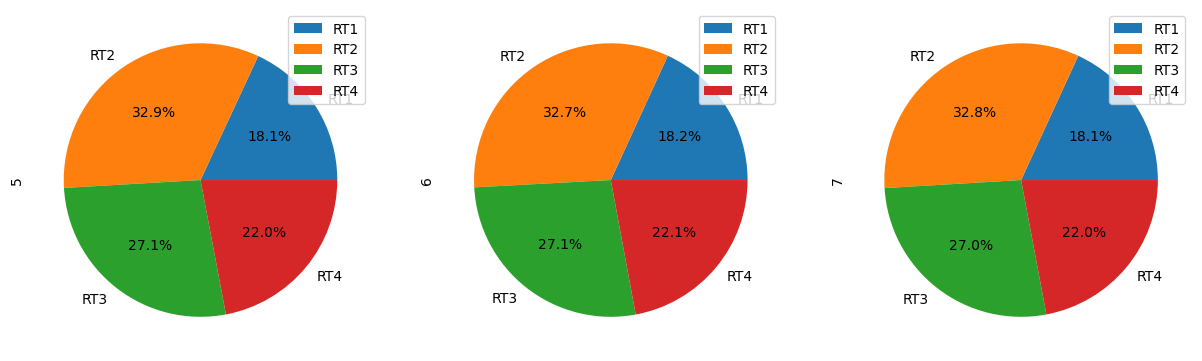

In [253]:
rt.pivot_table(index=['room_category'],columns=['mmm yy'],values='revenue_realized',aggfunc='sum').plot(kind='pie',autopct='%0.1f%%',subplots=True,figsize=(15,10))
plt.show()

#month wise room category wise analysis

<Axes: title={'center': 'Room Category wise Revenue Realization'}, xlabel='room_category', ylabel='revenue_realized'>

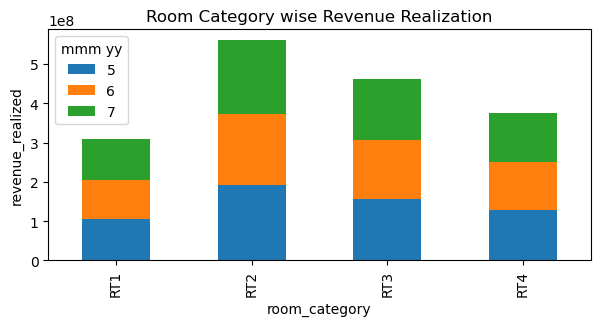

In [254]:
rt.pivot_table(index=['room_category'],columns=['mmm yy'],values='revenue_realized',aggfunc='sum').plot(kind='bar',stacked=True,figsize=(7,3),ylabel='revenue_realized',title='Room Category wise Revenue Realization')


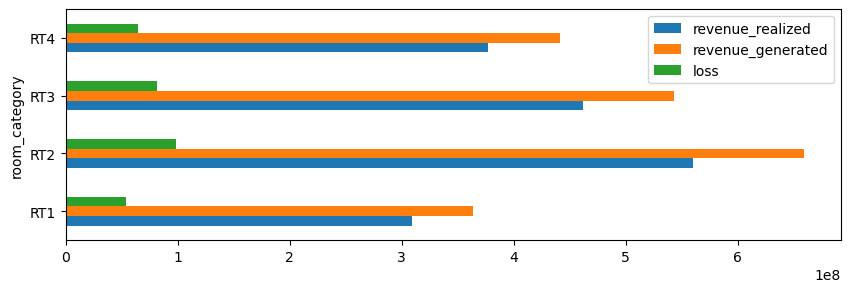

In [255]:
loss=booking_data.groupby('room_category')[['revenue_realized','revenue_generated']].sum()
loss['loss']=loss['revenue_generated']-loss['revenue_realized']
loss.plot(kind='barh',figsize=(10,3))
plt.show()

In [284]:
wow

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,date,mmm yy,week no,day_type
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4,Checked Out,9100,9100,0,2022-05-01,5.0,19,weekend
25,May012216558RT28,16558,2022-05-01,2022-05-01,2022-05-02,2,RT2,others,3,Checked Out,12600,12600,0,2022-05-01,5.0,19,weekend
64,May012216559RT115,16559,2022-05-01,2022-05-01,2022-05-03,2,RT1,tripster,3,Checked Out,11050,11050,0,2022-05-01,5.0,19,weekend
79,May012216559RT25,16559,2022-05-01,2022-05-01,2022-05-04,2,RT2,others,5,Checked Out,15300,15300,0,2022-05-01,5.0,19,weekend
81,May012216559RT27,16559,2022-05-01,2022-05-01,2022-05-02,4,RT2,others,3,Cancelled,18360,7344,11016,2022-05-01,5.0,19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,2022-07-29,7.0,31,weekday
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,2022-07-30,7.0,31,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,2022-07-30,7.0,31,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0,2022-07-29,7.0,31,weekday


In [307]:
ao=booking_data.merge(booking_agg,how='left',on='check_in_date').merge(date_data,how='left',left_on='check_in_date',right_on='date').groupby('week no')[['successful_bookings','revenue_realized','capacity','revenue_generated']].sum().reset_index()
ao['occupancy rate']=((ao['capacity']-ao['successful_bookings'])/ao['capacity'])*100
ao['adr']=ao['revenue_realized']/ao['successful_bookings']
ao
#week wise occupancy rate and adr

,week no,successful_bookings,revenue_realized,capacity,revenue_generated,occupancy rate,adr
0,19,17696863,13818206400,27719520,16317250500,36.157397,780.828015
1,20,17682226,13943592000,27701824,16328164500,36.169452,788.565422
2,21,12052838,11492217500,22858176,13471344500,47.271217,953.486432
3,22,17625344,13872012600,27641152,16354827000,36.235132,787.049183
4,23,12173133,11556856900,22976992,13529207500,47.020337,949.374077
5,24,17949335,13958170300,27911648,16463855500,35.692314,777.642754
6,25,17649027,13867427900,27663904,16355190500,36.201966,785.733282
7,26,11983309,11415242100,22794976,13452852000,47.430043,952.595155
8,27,17689688,13955563200,27711936,16360425000,36.165817,788.909516
9,28,17596329,13938391600,27628512,16314940000,36.310978,792.119288


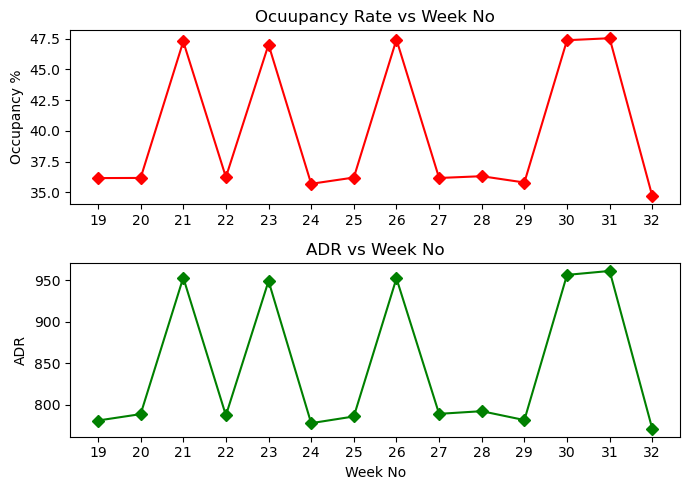

In [301]:
fig,ax=plt.subplots(2,1,figsize=(7,5))
ax[0].plot(ao['week no'],ao['occupancy rate'],marker='D',color='red')
ax[0].set_title('Ocuupancy Rate vs Week No')
ax[0].set_ylabel('Occupancy %')
ax[1].plot(ao['week no'],ao['adr'],marker='D',color='green')
ax[1].set_title('ADR vs Week No')
ax[1].set_xlabel('Week No')
ax[1].set_ylabel('ADR')
plt.tight_layout()
plt.show()

In [257]:
booking_data.groupby(['property_id','room_category','no_guests'])['revenue_generated'].unique()

#less pricing could hv earned more revenue if factors like facilities , services were apt - discussed earlier

property_id  room_category  no_guests
16558        RT1            1             [9100]
                            2             [9100]
                            3            [10010]
                            4            [10920]
             RT2            1            [12600]
                                          ...   
19563        RT4            2            [28500]
                            3            [31350]
                            4            [34200]
                            5            [37050]
                            6            [39900]
Name: revenue_generated, Length: 500, dtype: object

In [258]:
# checked out analysis

df_co['stay_dur']=df_co['checkout_date']-df_co['check_in_date']
df_co.info()

C:\Users\USER\AppData\Local\Temp\ipykernel_8600\3627024474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co['stay_dur']=df_co['checkout_date']-df_co['check_in_date']


<class 'pandas.core.frame.DataFrame'>
Index: 94411 entries, 0 to 134588
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   booking_id         94411 non-null  object         
 1   property_id        94411 non-null  int64          
 2   booking_date       94411 non-null  datetime64[ns] 
 3   check_in_date      94411 non-null  datetime64[ns] 
 4   checkout_date      94411 non-null  datetime64[ns] 
 5   no_guests          94411 non-null  int64          
 6   room_category      94411 non-null  object         
 7   booking_platform   94411 non-null  object         
 8   ratings_given      94411 non-null  int32          
 9   booking_status     94411 non-null  object         
 10  revenue_generated  94411 non-null  int64          
 11  revenue_realized   94411 non-null  int64          
 12  revenue_leakage    94411 non-null  int64          
 13  stay_dur           94411 non-null  timedelta64[ns]

In [259]:
df_co

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,stay_dur
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,1 days
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3 days
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,1 days
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4,Checked Out,9100,9100,0,2 days
8,May012216558RT19,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,tripster,3,Checked Out,9100,9100,0,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1,Checked Out,32300,32300,0,3 days
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2,Checked Out,32300,32300,0,1 days
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,3 days
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,1 days


In [260]:
#stay durations trend

df_co['stay_dur'].unique()

<TimedeltaArray>
['1 days', '3 days', '2 days', '6 days', '5 days', '4 days']
Length: 6, dtype: timedelta64[ns]

In [261]:
df_co.groupby(['stay_dur','ratings_given'])['booking_id'].count()

#analyis of performance and underperformance on basis of ratings given

stay_dur  ratings_given
1 days    1                 1658
          2                 3041
          3                26222
          4                 4615
          5                 9137
2 days    1                  681
          2                 1326
          3                11280
          4                 1956
          5                 3927
3 days    1                  313
          2                  502
          3                 4423
          4                  756
          5                 1587
4 days    1                  186
          2                  321
          3                 2755
          4                  471
          5                 1028
5 days    1                  351
          2                  637
          3                 5413
          4                  937
          5                 1939
6 days    1                  348
          2                  625
          3                 5196
          4                  918
          5        

In [262]:
booking_data['stay_dur']=booking_data['checkout_date']-booking_data['check_in_date']
booking_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,revenue_leakage,lead_time,stay_dur
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1,Checked Out,10010,10010,0,4,1 days
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,1,1 days
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5,Checked Out,9100,9100,0,3,3 days
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3,Cancelled,9100,3640,5460,3,1 days
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5,Checked Out,10920,10920,0,4,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2,Checked Out,32300,32300,0,2,3 days
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2,Checked Out,38760,38760,0,1,1 days
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3,Cancelled,32300,12920,19380,1,2 days
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2,Checked Out,32300,32300,0,2,1 days


In [263]:
booking_data.groupby(['stay_dur','booking_status'])['booking_id'].count().reset_index()

,stay_dur,booking_status,booking_id
0,1 days,Cancelled,16136
1,1 days,Checked Out,44673
2,1 days,No Show,3257
3,2 days,Cancelled,6598
4,2 days,Checked Out,19170
5,2 days,No Show,1376
6,3 days,Cancelled,2713
7,3 days,Checked Out,7581
8,3 days,No Show,548
9,4 days,Cancelled,1608


In [264]:
stay=booking_data.groupby(['stay_dur','booking_status'])['booking_id'].count().reset_index()
stay_canc=stay[stay['booking_status']=='Cancelled']
stay_canc

#badtrend

,stay_dur,booking_status,booking_id
0,1 days,Cancelled,16136
3,2 days,Cancelled,6598
6,3 days,Cancelled,2713
9,4 days,Cancelled,1608
12,5 days,Cancelled,3216
15,6 days,Cancelled,3149


In [265]:
stay_co=stay[stay['booking_status']=='Checked Out']
stay_co

#found that on stay dur more people are not preferring to stay

,stay_dur,booking_status,booking_id
1,1 days,Checked Out,44673
4,2 days,Checked Out,19170
7,3 days,Checked Out,7581
10,4 days,Checked Out,4761
13,5 days,Checked Out,9277
16,6 days,Checked Out,8949


In [266]:
stay_ns=stay[stay['booking_status']=='No Show']
stay_ns

,stay_dur,booking_status,booking_id
2,1 days,No Show,3257
5,2 days,No Show,1376
8,3 days,No Show,548
11,4 days,No Show,348
14,5 days,No Show,590
17,6 days,No Show,640


In [267]:
#staydur wrt room category

booking_data.groupby(['stay_dur','room_category'])['booking_id'].count().reset_index()

,stay_dur,room_category,booking_id
0,1 days,RT1,18269
1,1 days,RT2,23668
2,1 days,RT3,14323
3,1 days,RT4,7806
4,2 days,RT1,7774
5,2 days,RT2,9871
6,2 days,RT3,6201
7,2 days,RT4,3298
8,3 days,RT1,3113
9,3 days,RT2,3973


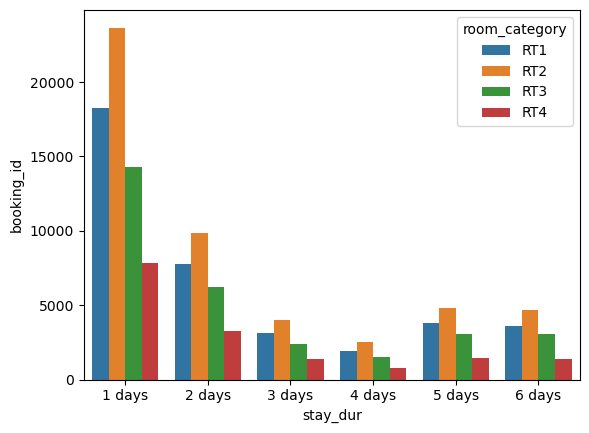

In [268]:
sns.barplot(data=booking_data.groupby(['stay_dur','room_category'])['booking_id'].count().reset_index(),x='stay_dur',y='booking_id',hue='room_category')
plt.show()
#stay duration wise booking

In [269]:
revpar.reset_index()

,room_category,0
0,RT1,4660.678294
1,RT2,6520.240248
2,RT3,8706.321001
3,RT4,13881.827045


In [270]:
booking_data.groupby(['stay_dur','room_category'])['revenue_realized'].sum()

stay_dur  room_category
1 days    RT1              146665428
          RT2              267264594
          RT3              216088320
          RT4              183522330
2 days    RT1               63131822
          RT2              112377042
          RT3               93642024
          RT4               77775474
3 days    RT1               24789791
          RT2               44766702
          RT3               36563520
          RT4               31765530
4 days    RT1               15655081
          RT2               28271304
          RT3               23314512
          RT4               17536962
5 days    RT1               30434872
          RT2               54676890
          RT3               46500912
          RT4               33237764
6 days    RT1               28903901
          RT2               52914672
          RT3               46057056
          RT4               32914726
Name: revenue_realized, dtype: int64

In [271]:
#roomwise canc rate
(df_canc.groupby('room_category')['booking_id'].count())/(booking_data.groupby('room_category')['booking_id'].count())*100

room_category
RT1    24.788014
RT2    24.961115
RT3    24.880586
RT4    24.438499
Name: booking_id, dtype: float64

In [272]:
adr

,property_id,room_category,0
0,16558,RT1,9461.768827
1,16558,RT2,13038.054299
2,16558,RT3,17576.736402
3,16558,RT4,27807.922705
4,16559,RT1,11429.373297
...,...,...,...
95,19562,RT4,29941.608392
96,19563,RT1,9991.922290
97,19563,RT2,13826.848512
98,19563,RT3,18717.721519


In [273]:
booking_agg.groupby(['property_id','room_category'])['successful_bookings'].sum().reset_index()

,property_id,room_category,successful_bookings
0,16558,RT1,1142
1,16558,RT2,1326
2,16558,RT3,478
3,16558,RT4,207
4,16559,RT1,1835
...,...,...,...
95,19562,RT4,858
96,19563,RT1,1467
97,19563,RT2,2218
98,19563,RT3,1422


In [274]:
adr.merge(booking_agg.groupby(['property_id','room_category'])['successful_bookings'].sum().reset_index(),how='inner',on=['property_id','room_category'])
#based on adr

,property_id,room_category,0,successful_bookings
0,16558,RT1,9461.768827,1142
1,16558,RT2,13038.054299,1326
2,16558,RT3,17576.736402,478
3,16558,RT4,27807.922705,207
4,16559,RT1,11429.373297,1835
...,...,...,...,...
95,19562,RT4,29941.608392,858
96,19563,RT1,9991.922290,1467
97,19563,RT2,13826.848512,2218
98,19563,RT3,18717.721519,1422


# Vizualisation Highlights
1. Booking Status wise distribution
2. Seasonal REVPAR Trend
3. City wise Successful Bookings
4. Room Category wise Cancellation Trend
5. Weekday vs Weekend Revenue by room category
6. Weekday vs Weekend Revenue by booking status
7. Booking Platforms vs Bookings
8. Stay Duration vs bookings
9. Booking vs Cancellations wrt Lead Time
10. Last min Cancellations vs Room Category
11. Revenue Leakage caused vs Booking Platform
12. Booked vs Unbooked comparison
13. Potential Revenue could have been generated
14. Week Wise Leakage Trend
15. Month wise Revenue Realized by room category
16. Room Category wise Revenue Realization
17. Revenue Realized vs Generated (Loss %) by Room Type
18. Occupancy Rate and ADR (Average Daily Rate) Comparison
19. Revenue Leakage Heatmap (Room Type × Day of Week)

# 1.Booking Status wise distribution

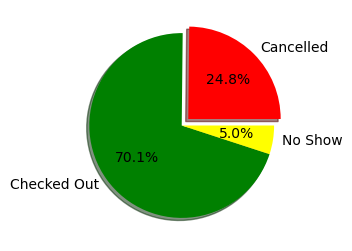

In [369]:
plt.figure(figsize=(7,3))
plt.pie(status['booking_id'],labels=status['booking_status'],explode=[0.1,0,0],autopct='%0.1f%%',shadow=True,colors=['red','green','yellow'])
plt.show()

# 2.Seasonal REVPAR Trend

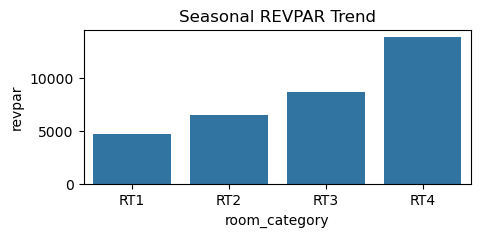

In [371]:
plt.figure(figsize=(5,2))
sns.barplot(revpar)
plt.title('Seasonal REVPAR Trend')
plt.ylabel('revpar')
plt.show()

# 3.City wise Successful Bookings

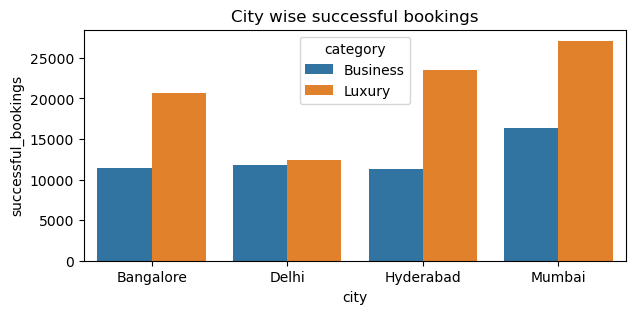

In [387]:
plt.figure(figsize=(7,3))
sns.barplot(data=sucb,x=sucb['city'],y='successful_bookings',errorbar=None,hue='category')
plt.title('City wise successful bookings')
plt.show()

# 4.Room Category wise Cancellation Trend

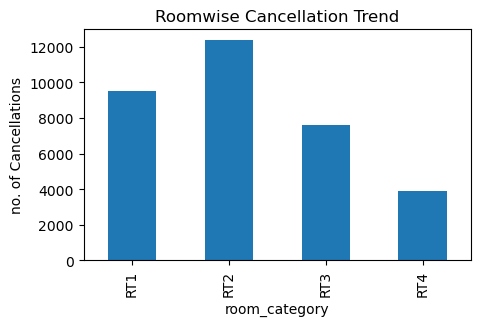

In [372]:
df_canc.groupby('room_category')['booking_id'].count().plot(kind='bar',figsize=(5,3),ylabel='no. of Cancellations',title='Roomwise Cancellation Trend')
plt.show()

# 5.Weekday vs Weekend Revenue by room category

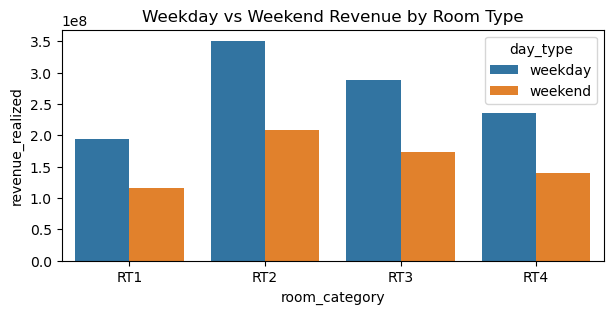

In [373]:
plt.figure(figsize=(7,3))
sns.barplot(data=wow4,x=wow4['room_category'],y='revenue_realized',errorbar=None,hue='day_type')
plt.title('Weekday vs Weekend Revenue by Room Type')
plt.show()

# 6.Weekday vs Weekend Revenue by booking status

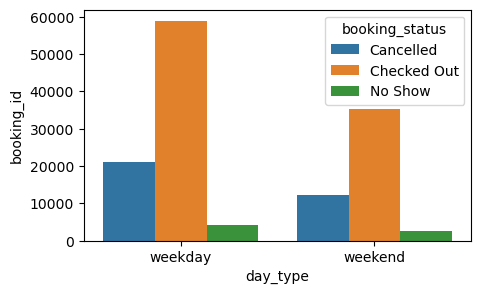

In [374]:
plt.figure(figsize=(5,3))
sns.barplot(data=wow3,x=wow3['day_type'],y='booking_id',errorbar=None,hue='booking_status')
plt.show()

# 7.Booking Platforms vs Bookings

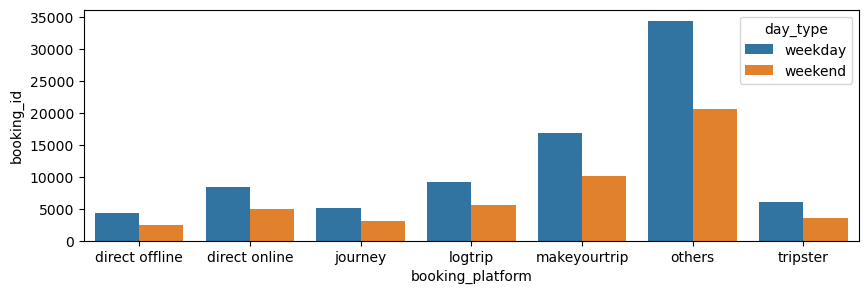

In [375]:
plt.figure(figsize=(10,3))
sns.barplot(data=wow2,x=wow2['booking_platform'],y='booking_id',errorbar=None,hue='day_type')
plt.show()

# 8.Stay Duration vs bookings

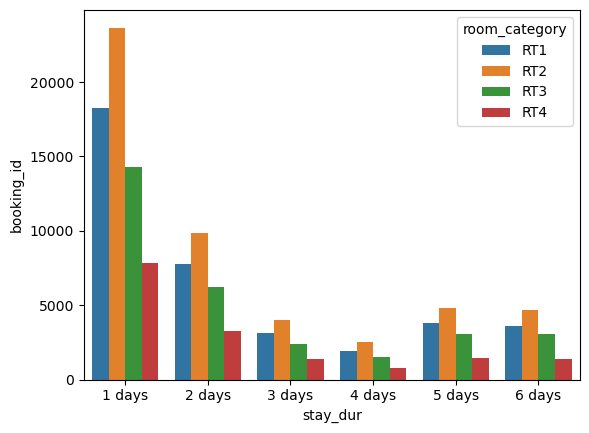

In [386]:
sns.barplot(data=booking_data.groupby(['stay_dur','room_category'])['booking_id'].count().reset_index(),x='stay_dur',y='booking_id',hue='room_category')
plt.show()

# 9.Booking vs Cancellations wrt Lead Time

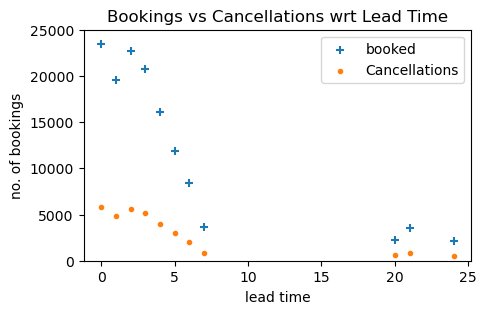

In [390]:
booking_data['lead_time']=(booking_data['check_in_date']-booking_data['booking_date']).dt.days
lead=booking_data.groupby('lead_time')['booking_id'].count().reset_index()
lead_canc=df_canc.groupby('lead_time')['booking_id'].count().reset_index()
plt.figure(figsize=(5,3))
plt.scatter(lead['lead_time'],lead['booking_id'],marker='+',label='booked')
plt.scatter(lead_canc['lead_time'],lead_canc['booking_id'],marker='.',label='Cancellations')
plt.xlabel('lead time')
plt.ylabel('no. of bookings')
plt.title('Bookings vs Cancellations wrt Lead Time')
plt.ylim(0,25000)
plt.legend()
plt.show()

# 10.Last min Cancellations vs Room Category

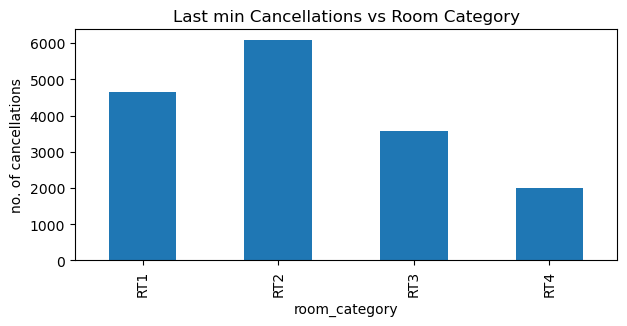

In [377]:
lstmin_canc=df_canc[df_canc['lead_time']<=2]
lstmin_canc.groupby('room_category')['booking_id'].count().plot(kind='bar',figsize=(7,3))
plt.ylabel('no. of cancellations')
plt.title('Last min Cancellations vs Room Category')
plt.show()

# 11.Revenue Leakage caused vs Booking Platform

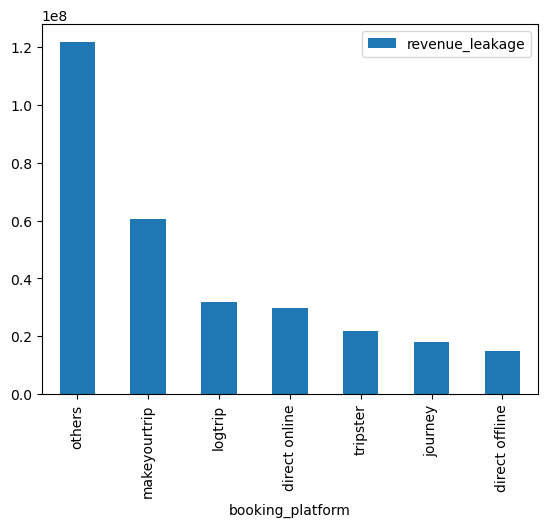

In [378]:
booking_data.groupby('booking_platform')['revenue_leakage'].sum().sort_values(ascending=False).reset_index().set_index('booking_platform').plot(kind='bar')
plt.show()

# 12.Booked vs Unbooked comparison

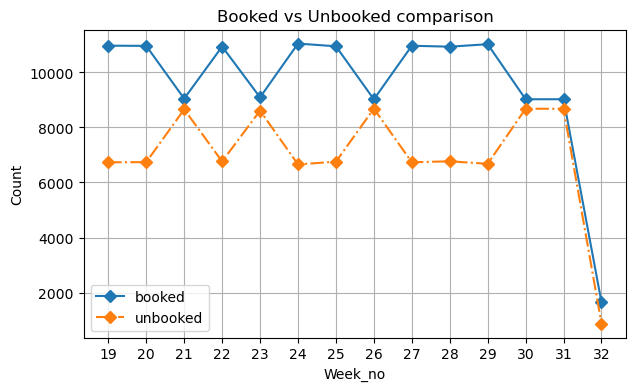

In [379]:
plt.figure(figsize=(7,4))
plt.plot(bub['week no'],bub['successful_bookings'],marker='D',label='booked')
plt.plot(bub['week no'],bub['unbooked'],marker='D',linestyle='dashdot',label='unbooked')

plt.title('Booked vs Unbooked comparison')
plt.xlabel('Week_no')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

# 13.Potential Revenue could have been generated

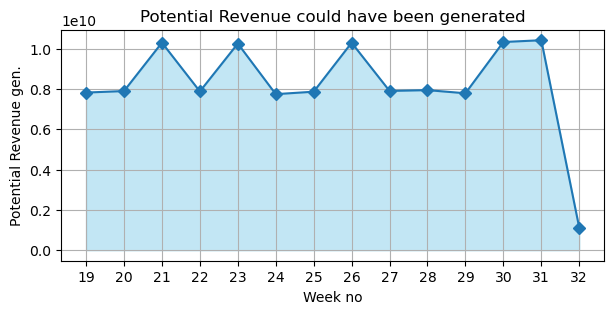

In [380]:
ao['unbooked']=ao['capacity']-ao['successful_bookings']
ao['potrev']=ao['unbooked']*ao['adr']
plt.figure(figsize=(7,3))
plt.plot(ao['week no'],ao['potrev'],marker='D')
plt.fill_between(ao['week no'], ao['potrev'], color="skyblue", alpha=0.5)
plt.title('Potential Revenue could have been generated')
plt.xlabel('Week no')
plt.ylabel('Potential Revenue gen.')
plt.grid()
plt.show()

# 14.Week Wise Leakage Trend

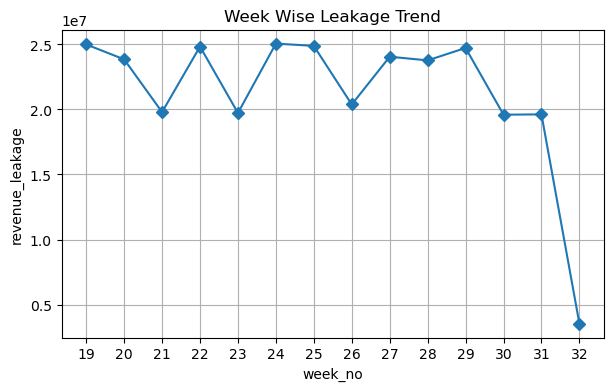

In [381]:
plt.figure(figsize=(7,4))
plt.plot(w_leak['week no'],w_leak['revenue_leakage'],marker='D')
plt.xlabel('week_no')
plt.ylabel('revenue_leakage')
plt.title('Week Wise Leakage Trend')
plt.grid()
plt.show()

# 15.Month wise Revenue Realized by room category

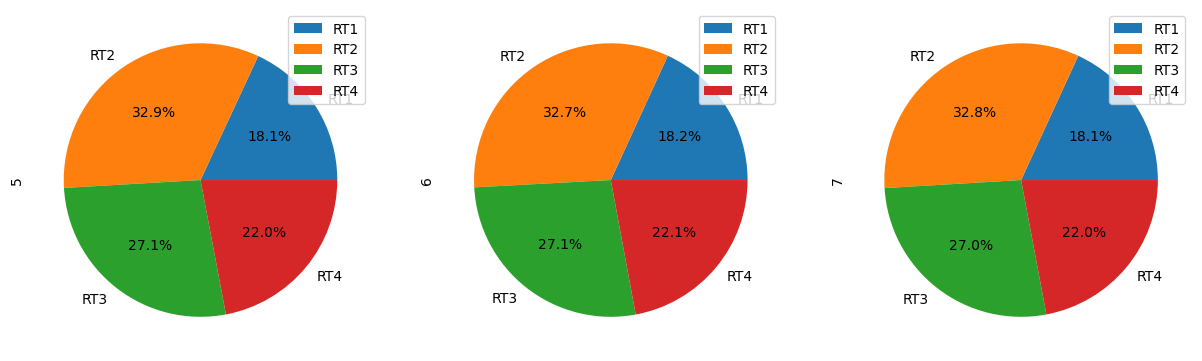

In [382]:
rt.pivot_table(index=['room_category'],columns=['mmm yy'],values='revenue_realized',aggfunc='sum').plot(kind='pie',autopct='%0.1f%%',subplots=True,figsize=(15,10))
plt.show()

# 16.Room Category wise Revenue Realization

<Axes: title={'center': 'Room Category wise Revenue Realization'}, xlabel='room_category', ylabel='revenue_realized'>

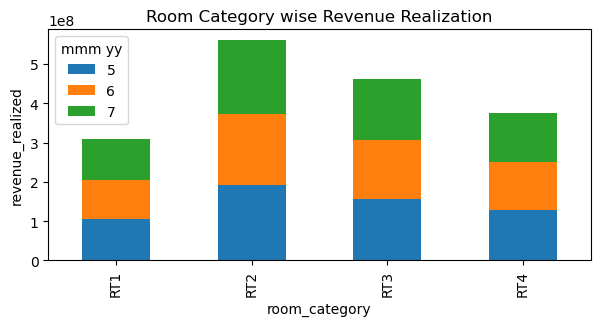

In [383]:
rt.pivot_table(index=['room_category'],columns=['mmm yy'],values='revenue_realized',aggfunc='sum').plot(kind='bar',stacked=True,figsize=(7,3),ylabel='revenue_realized',title='Room Category wise Revenue Realization')


# 17.Revenue Realized vs Generated (Loss %) by Room Type

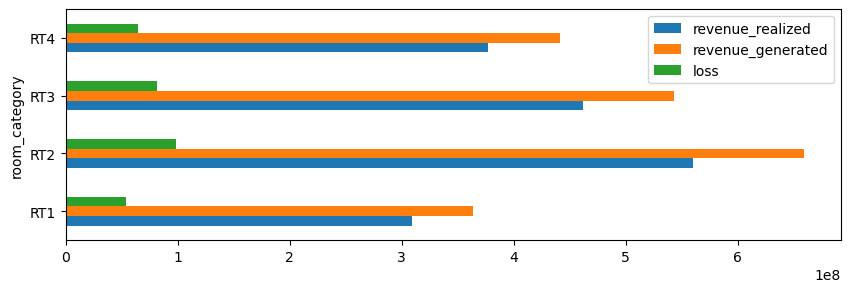

In [384]:
loss=booking_data.groupby('room_category')[['revenue_realized','revenue_generated']].sum()
loss['loss']=loss['revenue_generated']-loss['revenue_realized']
loss.plot(kind='barh',figsize=(10,3))
plt.show()

# 18.Occupancy Rate and ADR (Average Daily Rate) Comparison

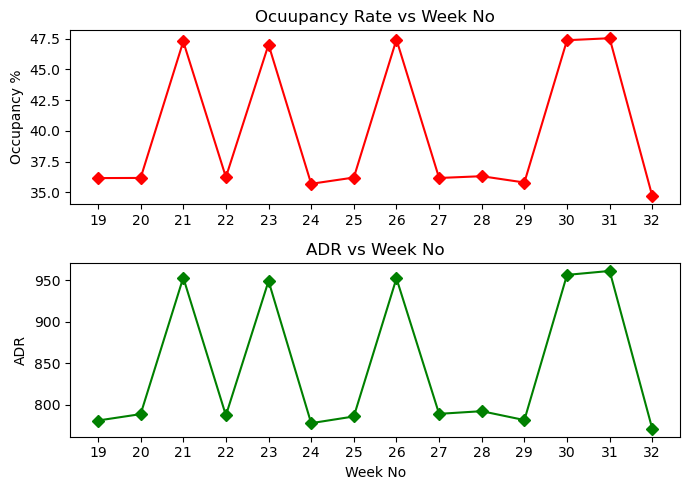

In [385]:
fig,ax=plt.subplots(2,1,figsize=(7,5))
ax[0].plot(ao['week no'],ao['occupancy rate'],marker='D',color='red')
ax[0].set_title('Ocuupancy Rate vs Week No')
ax[0].set_ylabel('Occupancy %')
ax[1].plot(ao['week no'],ao['adr'],marker='D',color='green')
ax[1].set_title('ADR vs Week No')
ax[1].set_xlabel('Week No')
ax[1].set_ylabel('ADR')
plt.tight_layout()
plt.show()

# 19.Revenue Leakage Heatmap (Room Type × Day of Week)

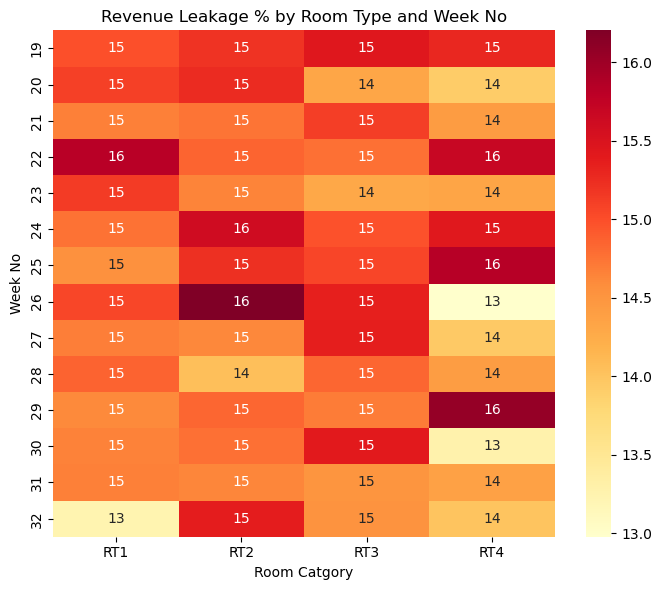

In [368]:
summ=booking_data.merge(date_data,how='left',left_on='check_in_date',right_on='date')
summ['leakage_pct']=(summ['revenue_leakage']/summ['revenue_generated'])*100
heat_data1=summ.groupby(['week no','room_category'])['leakage_pct'].mean().unstack()
plt.figure(figsize=(7, 6))
sns.heatmap(heat_data1, annot=True, cmap="YlOrRd")
plt.title("Revenue Leakage % by Room Type and Week No")
plt.xlabel("Room Catgory")
plt.ylabel("Week No")
plt.tight_layout()
plt.show()

# Overall summarization with respect to Room Category

In [275]:
#Composite scoring roomwise (in gen- (profitability + stability + utilization))

room_stats = booking_data.groupby("room_category").agg(
    revenue_realized=("revenue_realized", "sum"),
    bookings_total=("booking_id", "count"),
    cancellations=("booking_status", lambda x: (x == "Cancelled").sum())
).reset_index()
room_stats

,room_category,revenue_realized,bookings_total,cancellations
0,RT1,309580895,38446,9530
1,RT2,560271204,49505,12357
2,RT3,462166344,30566,7605
3,RT4,376752786,16073,3928


In [276]:
room_stats["cancellation_rate"] = room_stats["cancellations"] / room_stats["bookings_total"]
room_stats["booking_stability"] = 1 - room_stats["cancellation_rate"]

In [277]:
room_stats["revenue_score"] = (room_stats["revenue_realized"] - room_stats["revenue_realized"].min()) / (room_stats["revenue_realized"].max() - room_stats["revenue_realized"].min())
room_stats["utilization_score"] = (room_stats["bookings_total"] - room_stats["bookings_total"].min()) / (room_stats["bookings_total"].max() - room_stats["bookings_total"].min())

In [278]:
w_revenue = 0.4
w_stability = 0.3
w_utilization = 0.3

room_stats["composite_score"] = (
    w_revenue * room_stats["revenue_score"] +
    w_stability * room_stats["booking_stability"] +
    w_utilization * room_stats["utilization_score"]
)

In [279]:
room_stats

,room_category,revenue_realized,bookings_total,cancellations,cancellation_rate,booking_stability,revenue_score,utilization_score,composite_score
0,RT1,309580895,38446,9530,0.247880,0.752120,0.000000,0.669209,0.426399
1,RT2,560271204,49505,12357,0.249611,0.750389,1.000000,1.000000,0.925117
2,RT3,462166344,30566,7605,0.248806,0.751194,0.608661,0.433507,0.598875
3,RT4,376752786,16073,3928,0.244385,0.755615,0.267948,0.000000,0.333864


In [280]:
composite_ranked = room_stats.sort_values(by="composite_score", ascending=False)
composite_ranked['room_category']

#High score → Room is profitable, stable, and in demand
#Low score → Room is either underperforming, volatile, or unused

1    RT2
2    RT3
0    RT1
3    RT4
Name: room_category, dtype: object